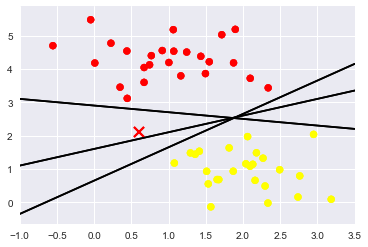

In [5]:
# 随机数据生成
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

# 参数分别为:样本点的个数,画成几堆,随机种子(每次),错误的离散程度(越大越分散)

X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)

# 随便华画几条分割线

xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')
plt.xlim(-1, 3.5)
plt.show()


In [6]:
# 训练一个基本的SVM

from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X, y)
print(model)
# 可以直接打印出来支持向量
print(model.support_vectors_)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
[[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]


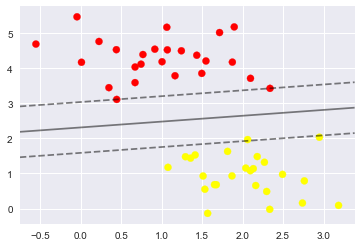

In [7]:
# 支持向量对决策边际的影响
def plot_svc_decision_function(model, ax=None, plot_support=True):
    '''plot the decision function for a 2D  SVC'''
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(),Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    ax.contour(X,Y,P,colors = 'k',levels=[-1,0,1],alpha = 0.5,linestyles=['--','-','--'])
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                   model.support_vectors_[:,1],
                   s=300,linewidth =1, facecolors = 'none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:,0],X[:,1],c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)
plt.show()

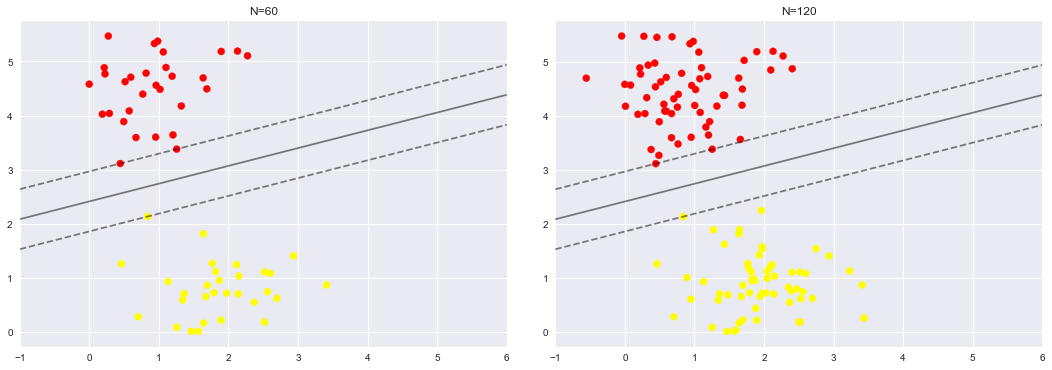

In [8]:
# 样本的密集程度变换,决策边界没有发成变换. 因为支持向量不变
def plot_svm(N =10, ax=None):
    X,y = make_blobs(n_samples=200,centers=2,random_state=0,cluster_std=0.6)
    X = X[:N]
    y =y[:N]
    model = SVC(kernel='linear',C=1E10)
    model.fit(X,y)
    ax = ax or plt.gca()
    ax.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
    ax.set_xlim(-1,4)
    ax.set_xlim(-1,6)
    plot_svc_decision_function(model,ax)

fig, ax = plt.subplots(1,2,figsize= (16,6))
fig.subplots_adjust(left=0.0625,right=0.95,wspace = 0.1)

for axi,N in zip(ax,[60,120]):
    plot_svm(N,axi)
    axi.set_title('N={0}'.format(N))
plt.show()


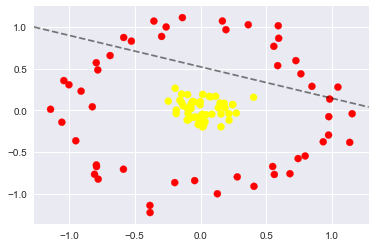

In [9]:
from sklearn.datasets.samples_generator import make_circles
'''
构造一个新的数据集,因为是一维线性的所以无法划分开,用高维核变换
'''
X,y = make_circles(100,factor=0.1,noise=0.1)
clf = SVC(kernel='linear').fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
a = plot_svc_decision_function(clf,plot_support=False)
plt.show()

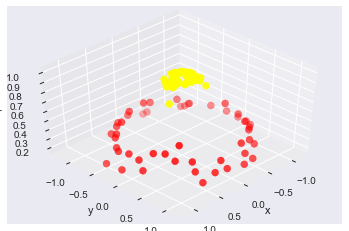

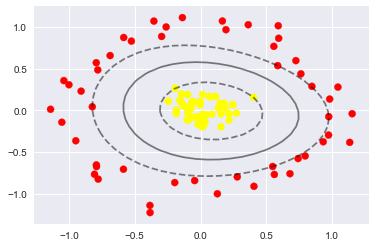

In [10]:
# 加入新的维度
from mpl_toolkits import mplot3d

r = np.exp(-(X**2).sum(1))
def plot_3D(elev=30,azim=30,X=X,y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:,0],X[:,1],r,c=y, s= 50,cmap='autumn')
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

plot_3D(elev=45,azim=45,X=X,y=y)
plt.show()
# 加入rdf(高斯)核函数
clf = SVC(kernel='rbf',C=1E6)
clf.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(clf)

plt.show()